In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [50]:
df = pd.read_csv('Visadataset.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### 1. Identifying Outliers with Visualization

In [3]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]
num_df

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


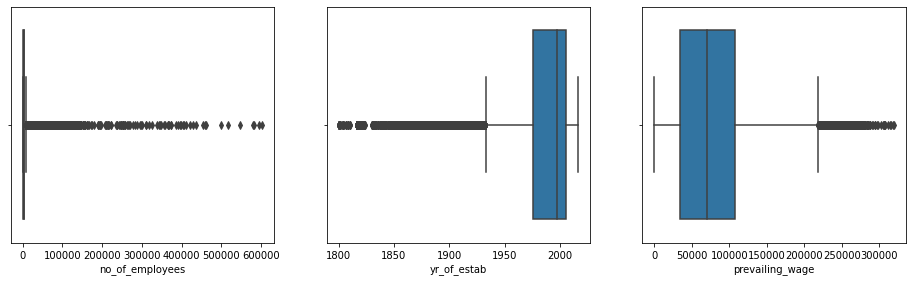

In [4]:
plt.figure(figsize=(50,20))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

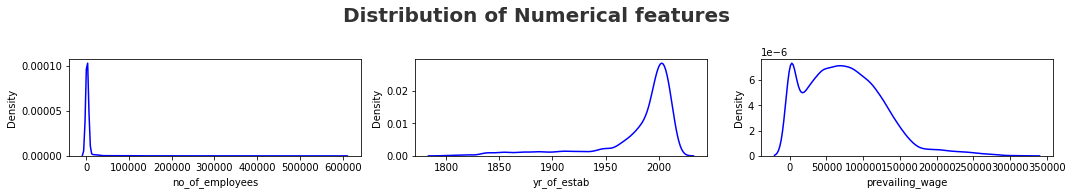

In [5]:
plt.figure(figsize=(15,10))
plt.suptitle('Distribution of Numerical features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
numerical_feat = [feature for feature in df.columns if df[feature].dtype!='O' ]
for i in range(0,len(num_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_features[i]],color='blue')
    plt.xlabel(numerical_feat[i])
    plt.tight_layout()

In [6]:
def count_outliers(data,col):
    q1 = data[col].quantile(0.25,interpolation='nearest')
    q2 = data[col].quantile(0.5,interpolation='nearest')
    q3 = data[col].quantile(0.75,interpolation='nearest')
    q4 = data[col].quantile(1,interpolation='nearest')
    IQR = q3-q1
    global LLP
    global ULP
    LLP = q1-(1.5*IQR)
    ULP = q3+(1.5*IQR)
    if data[col].min()>LLP and data[col].max() <ULP:
        print('No Outliers in',i)
    else:
        print('Outliers in ',i)
        x = data[data[col]<LLP][col].size
        y = data[data[col]>ULP][col].size
        a.append(i)
        print('Count of Outliers are :',x+y)
        
global a
a=[]
for i in num_df.columns:
    count_outliers(num_df,i)

Outliers in  no_of_employees
Count of Outliers are : 1556
Outliers in  yr_of_estab
Count of Outliers are : 3260
Outliers in  prevailing_wage
Count of Outliers are : 427


#### 2. Z Score Method

In [7]:
#Function to detect outliers
def outliers_threshold(dataframe,variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + (1.5 * interquartile_range)
    low_limit = quartile1 - (1.5 * interquartile_range)
    return low_limit , up_limit
    

In [8]:
outliers_threshold(num_df,num_df.columns)

(no_of_employees     -6558.5000
 yr_of_estab          1763.8500
 prevailing_wage   -200176.8295
 dtype: float64,
 no_of_employees     12045.5000
 yr_of_estab          2156.2500
 prevailing_wage    343609.7745
 dtype: float64)

In [9]:
#funtion to  remove outliers
def replace_with_threshold(dataframe,numeric_columns):
    for variable in numeric_columns:
        low_limit , up_limit = outliers_threshold(dataframe,variable)
        dataframe.loc[(dataframe[variable]< low_limit),variable] = low_limit
        dataframe.loc[(dataframe[variable]>up_limit),variable] = up_limit
        

In [10]:
replace_with_threshold(num_df,num_df.columns)

In [14]:
up_limit = num_df.loc[(num_df['no_of_employees']>12045),'no_of_employees']

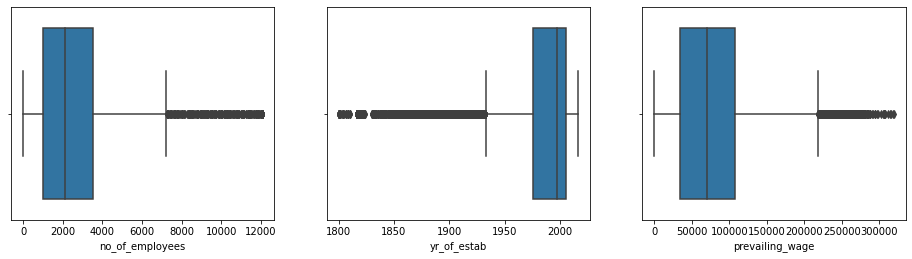

In [24]:
plt.figure(figsize=(50,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insight
- As we see from above boxplot outliers are not removed properly

#### 3. IQR method

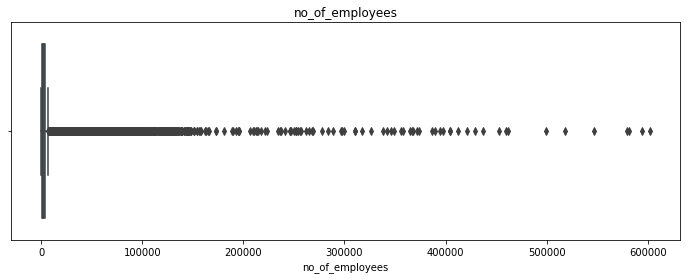

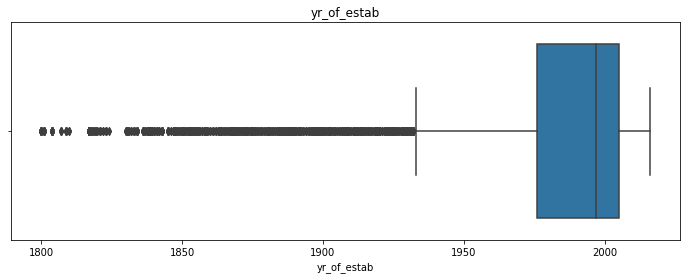

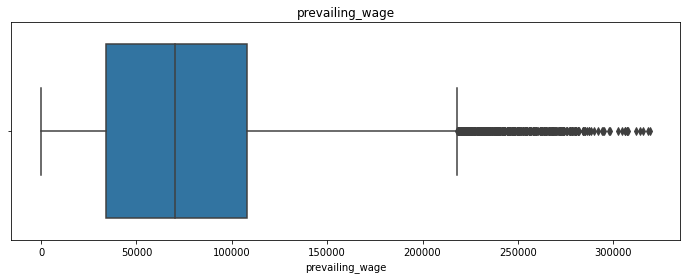

In [23]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [25]:
df1 = df.copy()
def remove_outliers_iqr(col):
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print('percentile25',percentile25)
    print('percentile75',percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5*iqr)
    print("Upper Limit :",upper_limit)
    print("Lower Limit :",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit,upper_limit,np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col]>upper_limit]

In [26]:
remove_outliers_iqr('no_of_employees')

percentile25 1022.0
percentile75 3504.0
Upper Limit : 7227.0
Lower Limit : -2701.0


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [27]:
def create_comparision_plot(df,df1,column):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])
    
    plt.subplot(2,2,2)
    sns.boxplot(df[column])
    
    plt.subplot(2,2,3)
    sns.distplot(df1[column])
    
    plt.subplot(2,2,4)
    sns.boxplot(df1[column])
    
    plt.show()

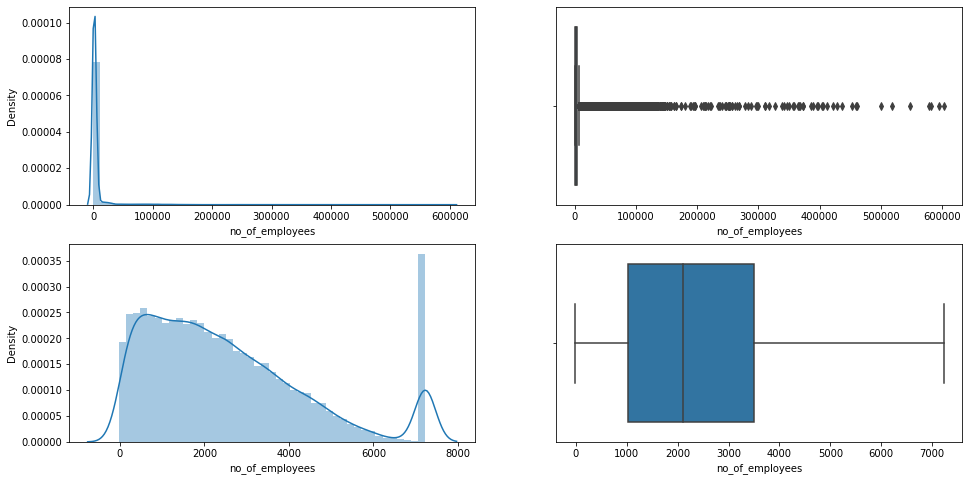

In [29]:
create_comparision_plot(df,df1,'no_of_employees')

In [32]:
remove_outliers_iqr('yr_of_estab')

percentile25 1976.0
percentile75 2005.0
Upper Limit : 2048.5
Lower Limit : 1932.5


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


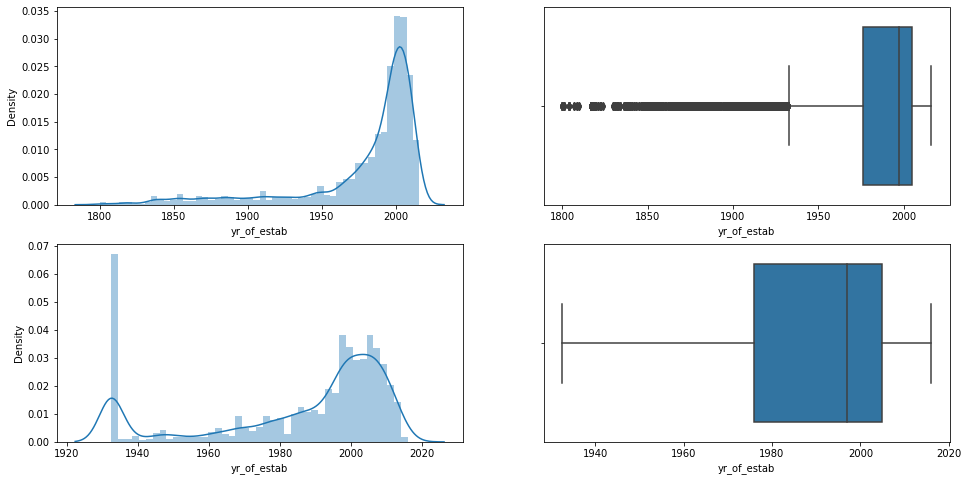

In [34]:
create_comparision_plot(df,df1,'yr_of_estab')

In [35]:
remove_outliers_iqr('prevailing_wage')

percentile25 34015.479999999996
percentile75 107735.51250000001
Upper Limit : 218315.56125000003
Lower Limit : -76564.56875000002


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


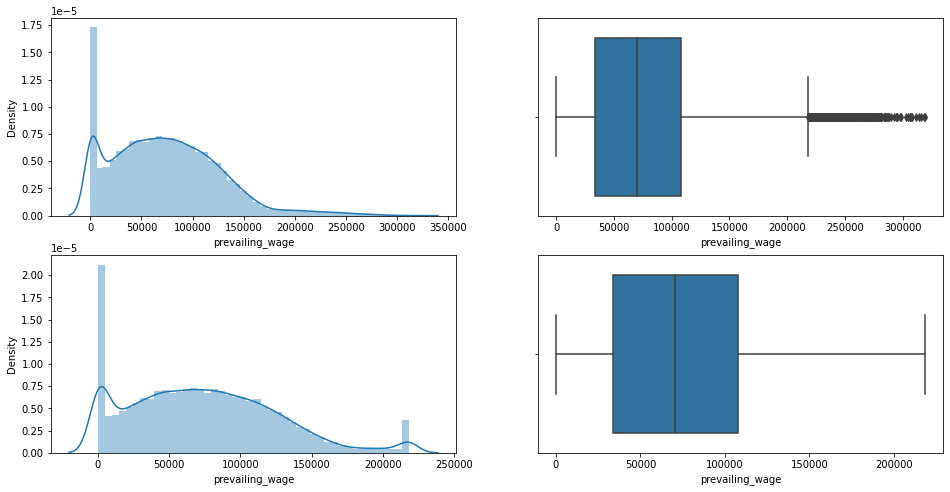

In [36]:
create_comparision_plot(df,df1,'prevailing_wage')

#### 4. Compare Skewness

In [37]:
df.skew()

no_of_employees    12.265260
yr_of_estab        -2.037301
prevailing_wage     0.755776
dtype: float64

In [39]:
df1.skew()

no_of_employees    0.958626
yr_of_estab       -1.111018
prevailing_wage    0.546741
dtype: float64

#### Insight 
- Skewness is reduced after we have removed outliers using IQR Method

In [55]:
df1.to_csv('outliers_removed.csv',index=False)